# Evaluate Some Algorithms:
We will create some models of data and estimate their accuracy on unseen data.

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [2]:
dataset = read_csv('Dataset/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print("Data set shape: ", dataset.shape)
dataset.head(10)

Data set shape:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Split-out dataset:
We will split the loaded dataset into two sets, 80% to train, validate and select among our models, and 20% that we will hold back as a testing dataset.


In [4]:
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(f'Training Set has: {X_train.shape[0]} samples\nTesting Set has {X_test.shape[0]} samples')

Training Set has: 120 samples
Testing Set has 30 samples


# Build Models to classify Iris Flowers:
We don’t know which algorithm would be good on this problem.

Let’s test **7** different algorithms (mixture of **linear** and **non-linear** algorithms):

1. **Logistic Regression**
2. **Linear discriminant Analysis**
3. **K-Nearest Neighbour**
4. **Classification and Regression Trees**
5. **Gaussian Naive Bayes**
6. **Support Vector Machines**
7. **Random Forest**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [13]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is limited to one-versus-rest schemes.

# multi_class : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
# If the option chosen is ‘ovr’ (one-vs-rest (OvR) scheme), then a binary problem is fit for each label.
# For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.
# ‘multinomial’ is unavailable when solver=’liblinear’.
# ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# gamma : {‘scale’, ‘auto’} or float, default=’scale’
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features.

models.append(('RF', RandomForestClassifier(n_estimators=200))) # n_estimators : The number of trees in the forest.

## Evaluate each model in turn

We will use **stratified 10-fold cross validation** to estimate model **accuracy**.

This will split our dataset into **10** parts, train on **9** and validate on **1** and repeat for all combinations of train-test splits.

We are using the metric of **‘accuracy‘** to evaluate models.

### `class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)`

Stratified K-Folds cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

### `sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

#### Parameters:

**estimator** : estimator object implementing ‘fit’
The object to use to fit the data.

**X** : array-like of shape (n_samples, n_features)
The data to fit. Can be for example a list, or an array.

**y** : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
The target variable to try to predict in the case of supervised learning.

**scoring** : str or callable, default=None
A str (see model evaluation documentation) or a scorer callable object / function with signature scorer(estimator, X, y) which should return only a single value.

**cv** : int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:

* **None**, to use the default 5-fold cross validation,

* **int**, to specify the number of folds in a (Stratified)KFold,

* **CV splitter**, (a cross-validation generator)

* **An iterable yielding** (train, test) splits as arrays of indices.

For **int**/**None** inputs, if the **estimator** is a classifier and **y** is either binary or multiclass, **StratifiedKFold** is used. In all other cases, **KFold** is used.

These splitters are instantiated with **shuffle = False** so the splits will be the same across calls.

#### Returns:

**scores** : ndarray of float 
Array of scores of the estimator for each run of the cross validation.



In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
RF: 0.958333 (0.041667)


## Select Best Model

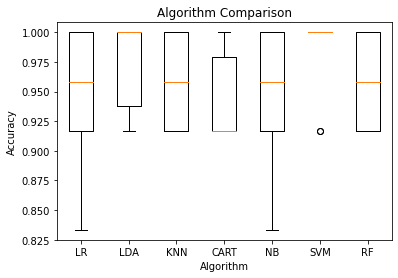

In [18]:
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Algorithm')
pyplot.show()

The results suggest that the **SVM** was perhaps the most accurate model. We will use this model as our **final model**.

So, We will fit the SVM on the **entire training dataset** and evaluate it on the testing dataset.


In [16]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

## Evaluate Predictions

SVM accuracy on the Testing Data: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



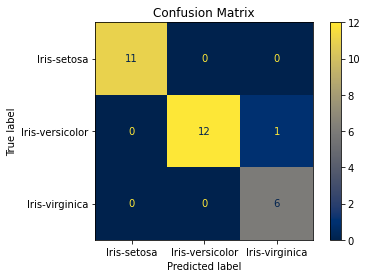

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

print('SVM accuracy on the Testing Data: {:.2f}'.format(accuracy_score(Y_test, predictions)))
plot_confusion_matrix(model, X_test, Y_test, cmap='cividis')
pyplot.title('Confusion Matrix')
print(classification_report(Y_test, predictions))